**Cell 1: Install and imports**

In [2]:
# Cell 1: Environment setup (Colab / Python)

!pip install --quiet yfinance

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("seaborn-v0_8")
pd.options.display.float_format = "{:,.2%}".format


**Cell 2: Defining list of tickers**

In [3]:
# Cell 2: Define your ticker universe (example subset here)

tickers = [
     "NVDA", "AAPL", "MSFT", "AMZN", "GOOGL", "GOOG","META", "AVGO", "TSLA","BRK-B", "LLY", "JPM", "WMT", "V", "ORCL", "MA", "XOM",
    "JNJ", "PLTR", "BAC", "ABBV", "NFLX", "COST", "AMD", "HD", "PG", "GE", "MU", "CSCO", "KO", "CVX", "WFC", "UNH", "MS", "IBM", "CAT",
    "GS","MRK", "AXP", "PM", "RTX", "CRM", "APP", "MCD", "LRCX", "TMUS", "TMO", "C", "ABT", "AMAT", "ISRG", "DIS", "LIN", "PEP", "INTU",
    "QCOM", "GEV", "SCHW", "AMGN", "BKNG", "T", "TJX", "INTC", "BA", "VZ", "BLK", "APH", "UBER", "KLAC", "NEE", "ACN", "ANET", "DHR",
    "TXN", "SPGI", "NOW", "COF", "GILD", "ADBE", "BSX", "PFE", "UNP", "LOW", "ADI", "SYK", "PGR", "PANW", "WELL", "DE", "ETN", "HON", "MDT",
    "CB", "BX", "CRWD", "PLD", "VRTX", "KKR", "NEM", "CEG", "COP", "LMT", "PH", "BMY", "CMCSA", "HOOD", "HCA", "ADP", "MCK", "CVS", "DASH",
    "CME", "MO","SBUX", "SO", "GD", "ICE", "MCO", "MMC", "DUK", "SNPS", "WM", "NKE", "TT", "CDNS", "APO", "USB", "UPS", "HWM", "CRH", "MMM",
    "DELL","MAR", "PNC", "NOC", "ABNB", "BK", "REGN", "AMT", "SHW", "RCL", "ORLY", "GM", "CTAS", "GLW", "AON", "EMR", "ELV", "MNST", "ECL",
    "FCX", "EQIX", "JCI", "TDG", "CI", "ITW", "WMB", "WBD", "CMI", "MDLZ", "FDX", "CSX", "TEL", "HLT", "AJG","RSG", "COR", "NSC", "TRV",
    "TFC", "CL", "PWR", "COIN", "ADSK", "MSI", "CVNA", "STX", "AEP", "SPG", "WDC", "KMI", "FTNT", "ROST", "PCAR", "SRE", "AFL", "AZO",
    "WDAY", "SLB", "NXPI", "EOG","NDAQ", "PYPL", "BDX", "LHX", "ZTS", "IDXX", "VST", "APD", "ALL", "MET", "DLR", "F", "URI", "O", "PSX",
    "EA", "D", "VLO", "CMG", "EW", "MPC", "CAH", "CBRE", "GWW", "ROP", "DDOG", "FAST","AME", "AXON", "AIG","AMP", "TTWO", "DAL", "OKE",
    "PSA", "MPWR", "CTVA", "CARR", "LVS", "ROK", "BKR", "EXC", "XEL", "MSCI", "TGT", "YUM", "DHI", "FANG", "ETR", "CTSH", "PAYX", "FICO",
    "CCL", "PEG", "XYZ", "PRU", "KR", "TRGP", "GRMN", "OXY", "A", "HIG", "VMC", "MLM", "EL", "IQV", "CCI", "EBAY", "KDP", "GEHC", "NUE",
    "CPRT", "WAB", "HSY", "VTR", "ARES", "UAL", "STT", "SNDK", "FISV", "ED", "RMD", "SYY", "MCHP", "KEYS", "EXPE", "ACGL", "FIS", "PCG",
    "WEC", "OTIS", "FIX", "XYL", "LYV", "EQT", "KMB", "ODFL", "KVUE", "HPE", "RJF", "IR", "WTW", "FITB", "MTB", "HUM", "TER", "SYF", "NRG",
    "VRSK", "VICI", "DG", "IBKR", "FSLR", "ROL", "MTD", "KHC", "CSGP", "EME", "HBAN", "ADM", "EXR", "BRO", "DOV", "TSCO", "ATO", "AEE",
    "ULTA","EFX", "CHTR", "WRB", "CBOE", "DTE", "BR", "TPR", "NTRS", "DXCM", "EXE", "LEN", "AVB", "FE", "CINF", "PPL", "BIIB", "CFG", "AWK",
    "STLD", "VLTO", "ES", "OMC", "STE", "GIS", "JBL", "CNP", "LULU", "STZ", "TDY","RF", "DLTR", "HUBB", "IRM", "EQR", "LDOS", "HAL", "PHM",
    "PPG", "EIX", "KEY", "WAT", "TROW", "VRSN", "DVN", "WSM", "L", "ON", "DRI","RL", "NTAP", "CPAY", "LUV", "CMS", "HPQ", "LH", "PTC", "IP",
    "TSN", "SBAC", "CHD", "TPL", "PODD", "EXPD", "NVR", "SW", "WST", "TYL", "NI", "INCY", "PFG", "CNC","DGX", "CTRA", "CHRW", "GPN",
    "AMCR", "TRMB", "JBHT","PKG", "MKC", "TTD", "SNA", "SMCI", "IT", "CDW", "ZBH", "FTV", "ALB", "Q", "GPC","LII", "PNR", "DD", "TKO",
    "GDDY","BG", "IFF", "WY", "GEN", "LNT", "ESS", "EVRG", "INVH", "HOLX", "APTV","DOW", "COO", "MAA", "J", "TXT", "FOXA", "FOX", "FFIV",
    "PSKY", "ERIE", "DECK", "BBY", "DPZ", "UHS", "EG", "VTRS", "AVY", "BALL", "HII", "SOLV", "ALLE", "KIM", "LYB", "NDSN", "IEX", "MAS",
    "JKHY", "HRL", "WYNN", "MRNA", "AKAM", "HST", "REG", "BEN", "ZBRA", "BF-B", "AIZ", "IVZ", "CF", "UDR", "CLX", "SWK", "CPT", "EPAM",
    "BLDR", "HAS", "GL", "ALGN", "DOC", "DAY", "RVTY", "BXP","FDS", "SJM", "PNW", "NCLH","MGM", "CRL", "AES","NWSA", "BAX", "SWKS", "AOS",
    "TECH", "TAP", "HSIC", "FRT", "PAYC", "APA", "POOL", "ARE", "MOH", "CPB", "GNRC", "CAG", "DVA", "MTCH", "MOS", "LW", "NWS"

]

tickers = (
    pd.Series(tickers)
    .astype(str)
    .str.strip()
    .str.replace(".", "-", regex=False)  # BRK.B -> BRK-B style tickers
    .dropna()
    .unique()
    .tolist()
)

print(f"Universe size: {len(tickers)}")
print("Sample tickers:", tickers[:15])


Universe size: 503
Sample tickers: ['NVDA', 'AAPL', 'MSFT', 'AMZN', 'GOOGL', 'GOOG', 'META', 'AVGO', 'TSLA', 'BRK-B', 'LLY', 'JPM', 'WMT', 'V', 'ORCL']


**Cell 3: Downloading OHLCV + Adj Close (YTD 2025)**

In [4]:
# Cell 3: Download OHLCV + Adj Close data

start_date = "2024-12-01"   # start a bit before 2024‑12‑31
end_date = datetime.today().strftime("%Y-%m-%d")

print(f"Downloading data from {start_date} to {end_date} ...")

raw_data = yf.download(
    tickers,
    start=start_date,
    end=end_date,
    auto_adjust=False,
    group_by="ticker"
)

print("Raw data shape:", raw_data.shape)

[*********************100%***********************]  503 of 503 completed

Raw data shape: (267, 3018)


**Cell 4: Building Adjusted Close panel**

In [5]:
# Cell 4: Building Adjusted Close panel

adj_close = pd.DataFrame()

for ticker in tickers:
    if hasattr(raw_data.columns, "levels"):
        if ticker in raw_data.columns.levels[0]:
            if "Adj Close" in raw_data[ticker].columns:
                adj_close[ticker] = raw_data[ticker]["Adj Close"]
    else:
        # Single‑ticker fallback
        if "Adj Close" in raw_data.columns:
            adj_close[ticker] = raw_data["Adj Close"]

# Drop tickers with no data
adj_close = adj_close.dropna(axis=1, how="all")

# Ensure clean time index
adj_close = adj_close.sort_index()
adj_close.index = pd.to_datetime(adj_close.index)

print("Adj Close panel shape:", adj_close.shape)
print(adj_close.head())


/tmp/ipython-input-3058061957.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adj_close[ticker] = raw_data[ticker]["Adj Close"]
/tmp/ipython-input-3058061957.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adj_close[ticker] = raw_data[ticker]["Adj Close"]
/tmp/ipython-input-3058061957.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragm

Adj Close panel shape: (267, 503)
                 NVDA       AAPL       MSFT       AMZN      GOOGL       GOOG  \
Date                                                                           
2024-12-02 13,858.25% 23,851.13% 42,782.40% 21,071.00% 17,062.54% 17,211.39%   
2024-12-03 14,021.20% 24,155.75% 42,804.24% 21,344.00% 17,047.62% 17,215.37%   
2024-12-04 14,509.03% 24,191.59% 43,421.69% 21,816.00% 17,349.09% 17,520.83%   
2024-12-05 14,502.03% 24,194.57% 43,937.88% 22,055.00% 17,176.96% 17,343.73%   
2024-12-06 14,240.11% 24,174.66% 44,032.18% 22,703.00% 17,382.92% 17,560.64%   

                 META       AVGO       TSLA      BRK-B  ...        ARE  \
Date                                                    ...              
2024-12-02 59,049.02% 16,457.79% 35,709.00% 47,733.00%  ... 10,316.63%   
2024-12-03 61,122.80% 16,619.88% 35,142.00% 47,019.00%  ... 10,158.64%   
2024-12-04 61,135.75% 16,858.09% 35,793.00% 46,832.00%  ...  9,868.04%   
2024-12-05 60,652.67% 16,849.19% 36

**Cell 5: Computing YTD total return from 31 Dec 2024. Computing total return as  (latest_prices / base_prices) - 1  using adjusted close is a common way to rank stocks by performance over a fixed horizon.**

In [6]:
# Cell 5: Compute YTD total returns using 2024‑12‑31 as base

base_date = pd.Timestamp("2024-12-31")

# Forward‑filling across the short December/January window
adj_ffill = adj_close.ffill()

# Base price: last available price on or before 2024‑12‑31
if (adj_ffill.index <= base_date).any():
    base_prices = adj_ffill.loc[:base_date].iloc[-1]
else:
    raise ValueError("No data on or before 2024‑12‑31 in adj_close.")

# Latest price: most recent available close
latest_prices = adj_ffill.iloc[-1]

# Keep only tickers with non‑NaN base and latest prices
valid_mask = base_prices.notna() & latest_prices.notna()
base_prices = base_prices[valid_mask]
latest_prices = latest_prices[valid_mask]

# Price‑based YTD total return
ytd_return = (latest_prices / base_prices) - 1

returns_df = (
    pd.DataFrame({
        "Ticker": ytd_return.index,
        "YTD_Total_Return": ytd_return.values
    })
    .dropna(subset=["YTD_Total_Return"])
    .sort_values("YTD_Total_Return", ascending=False)
    .reset_index(drop=True)
)

print("Cleaned tickers ranked:", len(returns_df))
returns_df.head()


Cleaned tickers ranked: 501


,Ticker,YTD_Total_Return
0,WDC,299.91%
1,MU,241.62%
2,STX,236.93%
3,HOOD,223.24%
4,NEM,186.15%


**Cell 6: Console output – top & bottom performers and summary**

In [7]:
# Cell 6: Tabular output for reporting. This gives buy‑side PMs and risk teams immediate, console‑friendly leaderboards.

top_n = 20
bottom_n = 20

print(f"Top {top_n} performers YTD (price return):\n")
print(returns_df.head(top_n))

print(f"\nBottom {bottom_n} performers YTD (price return):\n")
print(returns_df.tail(bottom_n))

print("\nSummary:")
print(f"Universe size (valid YTD): {len(returns_df)}")
print(f"Best performer YTD:  {returns_df.iloc[0]['Ticker']} "
      f"({returns_df.iloc[0]['YTD_Total_Return']:.2%})")
print(f"Worst performer YTD: {returns_df.iloc[-1]['Ticker']} "
      f"({returns_df.iloc[-1]['YTD_Total_Return']:.2%})")


Top 20 performers YTD (price return):

   Ticker  YTD_Total_Return
0     WDC           299.91%
1      MU           241.62%
2     STX           236.93%
3    HOOD           223.24%
4     NEM           186.15%
5     WBD           176.54%
6    PLTR           156.74%
7    LRCX           147.76%
8     FIX           126.73%
9     APP           124.65%
10   CVNA           117.14%
11   KLAC           104.39%
12    GEV           103.20%
13    TPR           102.51%
14    APH           100.15%
15    HWM            94.51%
16    HII            92.50%
17    GLW            92.26%
18     GE            90.77%
19    CVS            83.79%

Bottom 20 performers YTD (price return):

    Ticker  YTD_Total_Return
481    UNH           -33.65%
482    CNC           -34.15%
483    CAG           -34.21%
484     LW           -34.79%
485    STZ           -34.82%
486   GDDY           -35.58%
487   ZBRA           -36.33%
488    LYB           -36.59%
489    CMG           -37.15%
490    CLX           -37.26%
491    DOW 

**Cell 7: Saving table of YTD returns to CSV**

In [8]:
# Cell 7: Persist results for downstream use. This CSV can be fed into downstream risk engines, optimisers, or dashboards.

output_file = "universe_ytd_returns_base_2024_12_31.csv"
returns_df.to_csv(output_file, index=False)

print(f"YTD returns successfully written to '{output_file}'.")


YTD returns successfully written to 'universe_ytd_returns_base_2024_12_31.csv'.


**Cell 8 – Plot 1: Top‑20 bar chart (performance dashboard)**

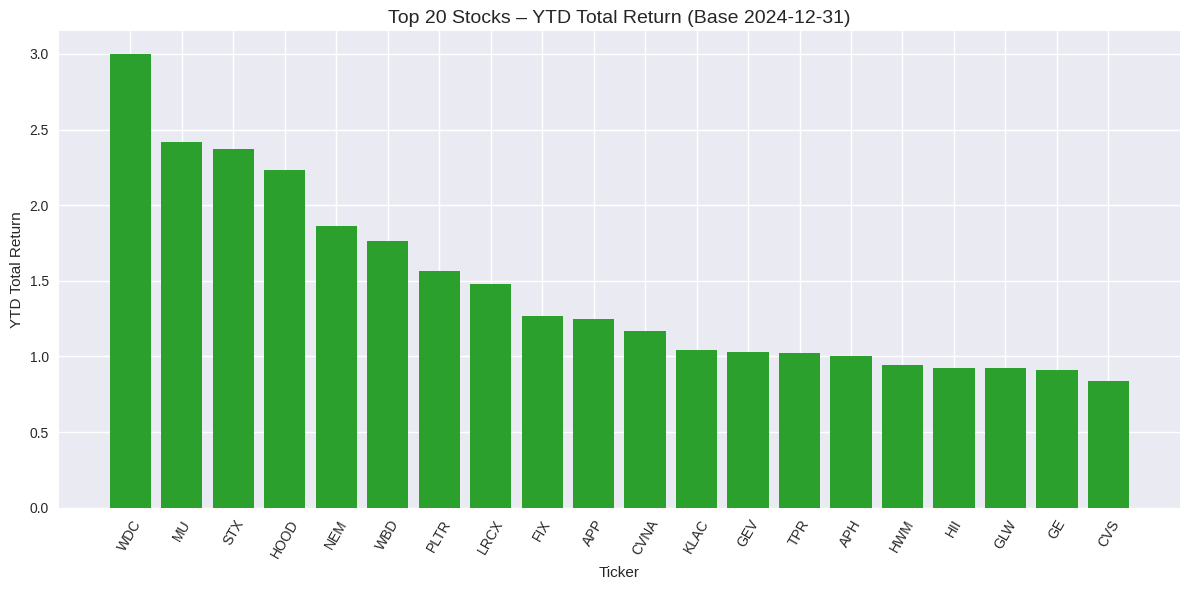

In [9]:
# Cell 8: Bar chart – Top 20 performers. This is a classic PM/committee slide: who drove upside.

plot_top = 20
top_df = returns_df.head(plot_top).copy()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_df["Ticker"], top_df["YTD_Total_Return"], color="tab:green")

ax.set_title(f"Top {plot_top} Stocks – YTD Total Return (Base 2024‑12‑31)", fontsize=14)
ax.set_xlabel("Ticker")
ax.set_ylabel("YTD Total Return")
ax.tick_params(axis="x", rotation=60)

plt.tight_layout()
plt.show()


**Cell 9 – Plot 2: Bottom‑20 bar chart (risk / drawdown focus)**

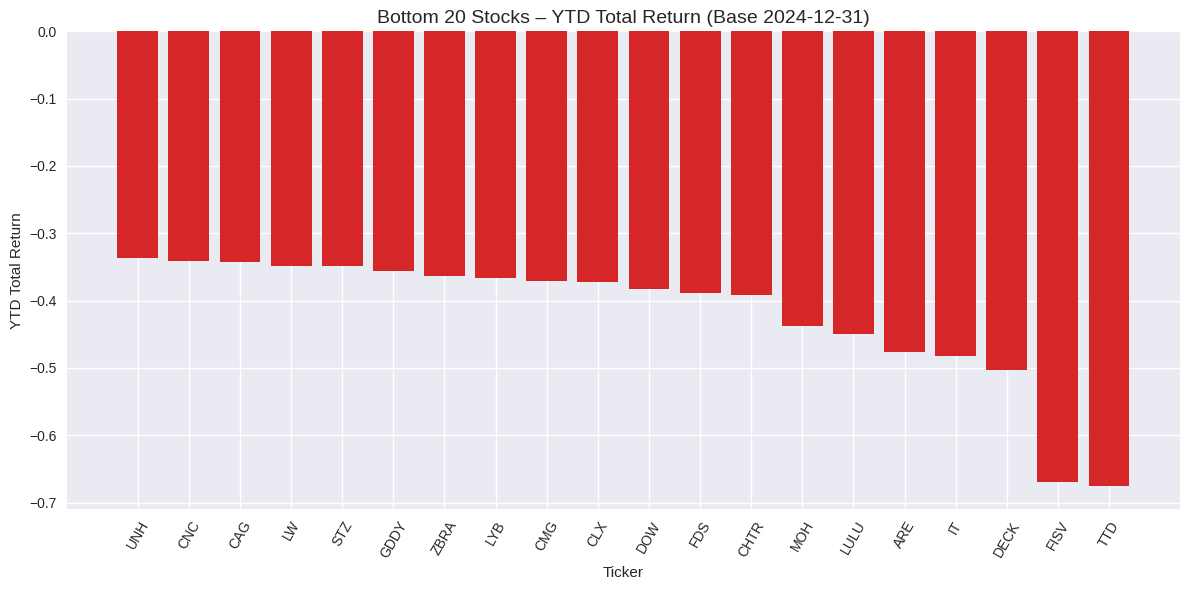

In [10]:
# Cell 9: Bar chart – Bottom 20 performers. This supports de‑risking and name‑level review.

plot_bottom = 20
bottom_df = returns_df.tail(plot_bottom).copy()

fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(bottom_df["Ticker"], bottom_df["YTD_Total_Return"], color="tab:red")

ax.set_title(f"Bottom {plot_bottom} Stocks – YTD Total Return (Base 2024‑12‑31)", fontsize=14)
ax.set_xlabel("Ticker")
ax.set_ylabel("YTD Total Return")
ax.tick_params(axis="x", rotation=60)

plt.tight_layout()
plt.show()


**Cell 10 – Plot 3: Cross‑sectional distribution (dispersion)**

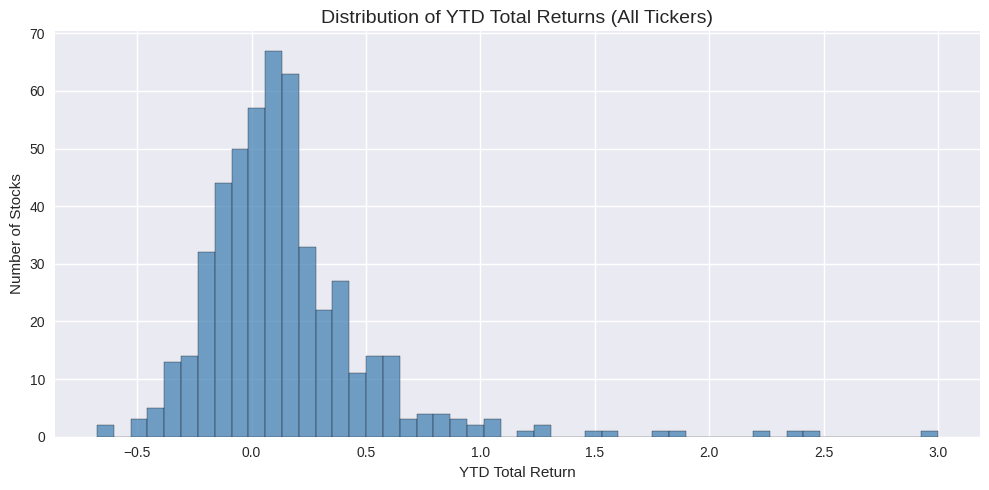

In [11]:
# Cell 10: Histogram of cross‑sectional YTD returns. Risk teams often track dispersion as a proxy for opportunity/risk in the cross‑section.

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(returns_df["YTD_Total_Return"], bins=50, color="steelblue", edgecolor="black", alpha=0.75)

ax.set_title("Distribution of YTD Total Returns (All Tickers)", fontsize=14)
ax.set_xlabel("YTD Total Return")
ax.set_ylabel("Number of Stocks")

plt.tight_layout()
plt.show()


**Cell 11 – Plot 4: Cumulative returns from 2024‑12‑31 for key names**

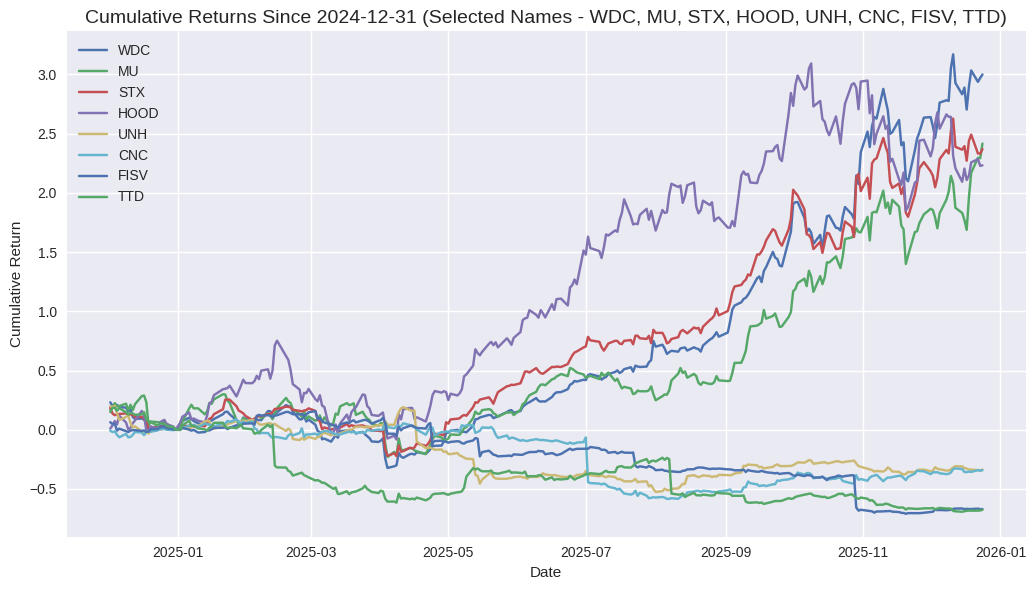

In [15]:
# Cell 11: Cumulative return time series for selected names

# choose a few names from your universe or top/bottom lists
focus_names = ["WDC", "MU", "STX", "HOOD", "UNH", "CNC", "FISV", "TTD"]
focus_names = [t for t in focus_names if t in adj_ffill.columns and t in base_prices.index]

if focus_names:
    cum_returns = adj_ffill[focus_names].div(base_prices[focus_names], axis=1) - 1

    fig, ax = plt.subplots(figsize=(10.5, 6))
    for ticker in focus_names:
        ax.plot(cum_returns.index, cum_returns[ticker], label=ticker)

    ax.set_title("Cumulative Returns Since 2024‑12‑31 (Selected Names - WDC, MU, STX, HOOD, UNH, CNC, FISV, TTD)", fontsize=14)
    ax.set_xlabel("Date")
    ax.set_ylabel("Cumulative Return")
    ax.legend(loc="upper left")

    plt.tight_layout()
    plt.show()
else:
    print("No focus names found in the valid universe.")
